In [2]:
# def import_librarys():
#     !pip install hvplot
#     import warnings
#     warnings.filterwarnings('ignore')
#     import pandas as pd
#     import numpy as np

#     pd.options.display.max_columns = 100
#     pd.options.display.max_rows = 900

#     import matplotlib
#     import matplotlib.pyplot as plt

#     import pandas as pd, numpy as np
#     import hvplot.pandas 
#     import plotly.express as px
#     import panel as pn
#     import holoviews as hv
#     from holoviews import opts
#     from matplotlib.figure import Figure
#     from matplotlib.backends.backend_agg import FigureCanvas

#     import pandas as pd
#     import holoviews as hv
#     import hvplot.pandas
#     hv.extension('bokeh')

#     %matplotlib inline


In [3]:
def hist_plot_whole_data():
    import pandas as pd
    import matplotlib.pyplot as plt
    %matplotlib inline
    df = pd.read_csv("/content/drive/MyDrive/creditcard.csv")
    df.hist(figsize=(20,20))
    plt.show()


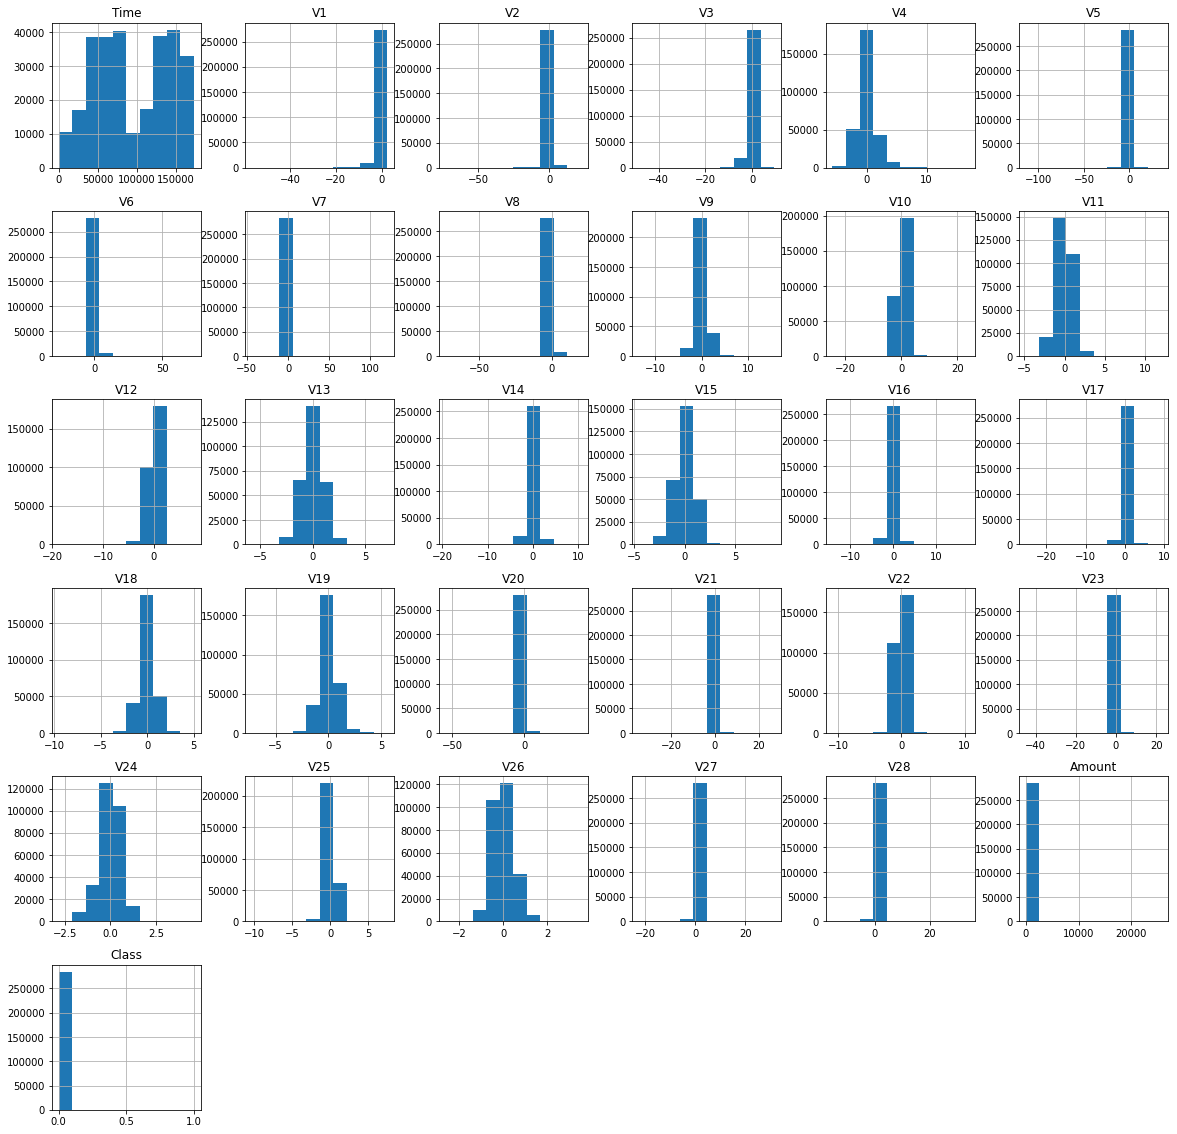

In [4]:
hist_plot_whole_data()


In [5]:
def plot_corr():
    import pandas as pd
    import matplotlib.pyplot as plt
    df = pd.read_csv("/content/drive/MyDrive/creditcard.csv")
    correl = df.corr()
    import plotly.express as px
    fig = px.imshow(correl)
    fig.show()




In [6]:
plot_corr()

In [7]:
def plot_corr_between_time_vs_amount():
    import pandas as pd
    import matplotlib.pyplot as plt
    import plotly.express as px
    df = pd.read_csv("/content/drive/MyDrive/creditcard.csv")
    corr_data = df[['Time','Amount']]
    cor = corr_data.corr()

    fig = px.imshow(cor)
    fig.show()
    


In [8]:
plot_corr_between_time_vs_amount()

In [9]:
def parches_price_and_day_with_groubpy():
    import pandas as pd
    import matplotlib.pyplot as plt
    import plotly.express as px
    df = pd.read_csv("/content/drive/MyDrive/creditcard.csv")
    times = pd.to_datetime(df['Time'])
    df['trans_day'] = times.dt.day
    day_and_parchas_price = df.groupby('Amount').trans_day.size()
    day_and_parchas_price = day_and_parchas_price.reset_index()
    top_10 = day_and_parchas_price[:10]
    fig = px.bar(top_10, x="Amount", y="trans_day", title='purchase prices and times of day with groupby')
    fig.show()



In [10]:
parches_price_and_day_with_groubpy()

In [11]:
def plot_top_10_amount_vs_time():
    import pandas as pd
    import matplotlib.pyplot as plt
    import plotly.express as px
    df = pd.read_csv("/content/drive/MyDrive/creditcard.csv")
    time_amount = df[['Time','Amount']]
    top_10 = time_amount[:10]
    fig = px.line(top_10,x='Time',y='Amount',title='Amout vs Time')
    fig.show()

In [12]:
plot_top_10_amount_vs_time()

In [13]:
def finding_outlaiers_in_data():
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import plotly.express as px
    df = pd.read_csv("/content/drive/MyDrive/creditcard.csv")
    new_df = df[:100]
    from matplotlib.figure import Figure
    from matplotlib.backends.backend_agg import FigureCanvas

    def mpl_plot(avg, highlight):
        fig = Figure()
        FigureCanvas(fig) # not needed in mpl >= 3.1
        ax = fig.add_subplot()
        avg.plot(ax=ax)
        if len(highlight): highlight.plot(style='o', ax=ax)
        return fig

    def find_outliers(variable='Amount', window=30, sigma=10, view_fn=mpl_plot):
        avg = new_df[variable].rolling(window=window).mean()
        residual = new_df[variable] - avg
        std = residual.rolling(window=window).std()
        outliers = (np.abs(residual) > std * sigma)
        return view_fn(avg, avg[outliers])

    return find_outliers(variable='Amount', window=10, sigma=5)

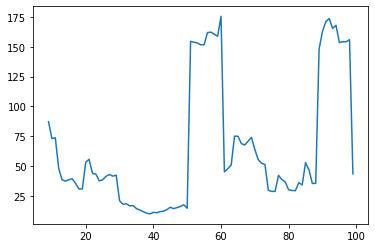

In [14]:
finding_outlaiers_in_data()

In [15]:
def distribuition_of_transaction_amount_vs_transaction_time():
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import plotly.express as px
    df = pd.read_csv("/content/drive/MyDrive/creditcard.csv")
    new_df = df[:100]
    from matplotlib.figure import Figure
    from matplotlib.backends.backend_agg import FigureCanvas
    time_val = df['Time'].values

    amount_val = df['Amount'].values
    import seaborn as sns
    fig, ax = plt.subplots(1, 2, figsize=(18,4))

    sns.distplot(amount_val, ax=ax[0], color='r')
    ax[0].set_title('Distribution showing Transaction Amount', fontsize=14)
    ax[0].set_xlim([min(amount_val), max(amount_val)])

    sns.distplot(time_val, ax=ax[1], color='b')
    ax[1].set_title('Distribution showing Transaction Time', fontsize=14)
    ax[1].set_xlim([min(time_val), max(time_val)])



    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



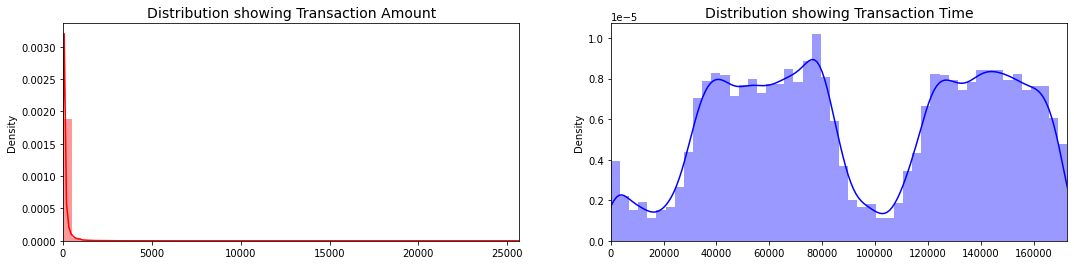

In [16]:
distribuition_of_transaction_amount_vs_transaction_time()

In [17]:
def box_plot_fraud_and_genuine_transaction():
    import pandas as pd
    import numpy as np
    import seaborn as sns
    import matplotlib.pyplot as plt
    import plotly.express as px
    df = pd.read_csv("/content/drive/MyDrive/creditcard.csv")
    genuine_transaction = df.loc[df['Class'] == 0]["Amount"]
    fraud_transaction = df.loc[df['Class'] == 1]["Amount"]
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=True)
    s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=False)
    plt.show();

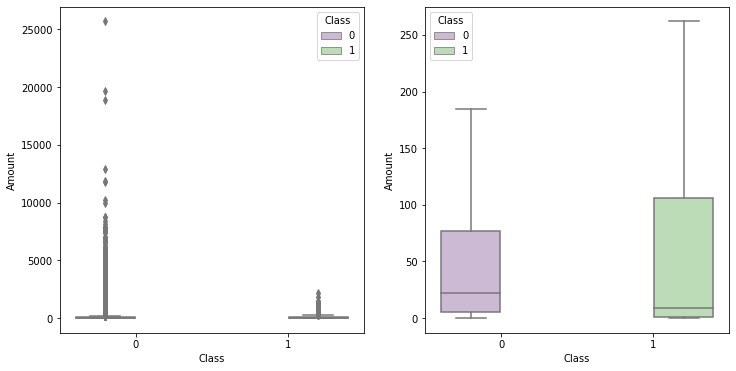

In [18]:
box_plot_fraud_and_genuine_transaction()

In [19]:
def box_plot_fraud_and_genuine():
    import pandas as pd
    import numpy as np
    import seaborn as sns
    import matplotlib.pyplot as plt
    import plotly.express as px
    df = pd.read_csv("/content/drive/MyDrive/creditcard.csv")
    genuine_transaction = df.loc[df['Class'] == 0]["Amount"]
    fraud_transaction = df.loc[df['Class'] == 1]["Amount"]
    sns.set_theme(style="whitegrid")

    ax = sns.barplot(x='Class', y='Amount', data=df)


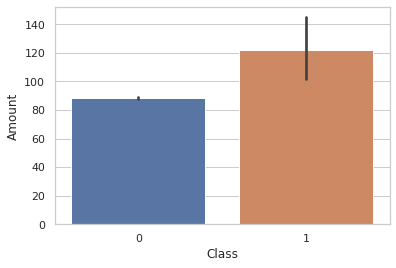

In [20]:
box_plot_fraud_and_genuine()